In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [52]:
import pandas as pd
df = pd.read_csv('heart.csv')
df.shape

(1025, 14)

In [53]:
df.drop_duplicates(inplace=True)
df.shape

(302, 14)

In [54]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [55]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [57]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [58]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Axes: >

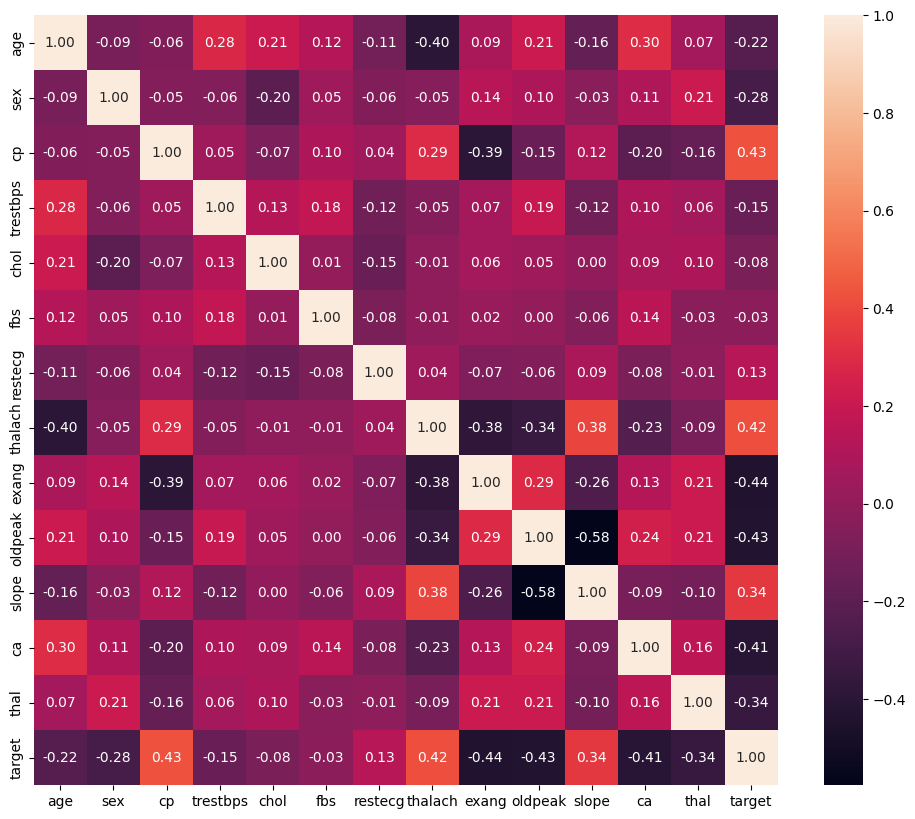

In [59]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f")

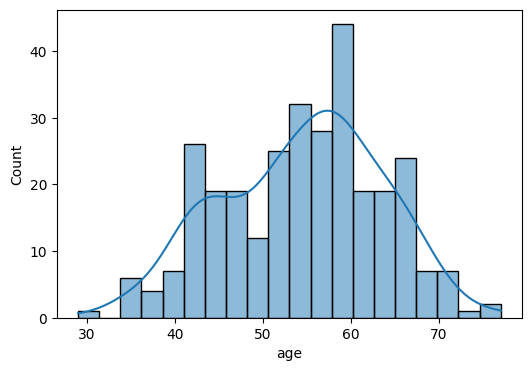

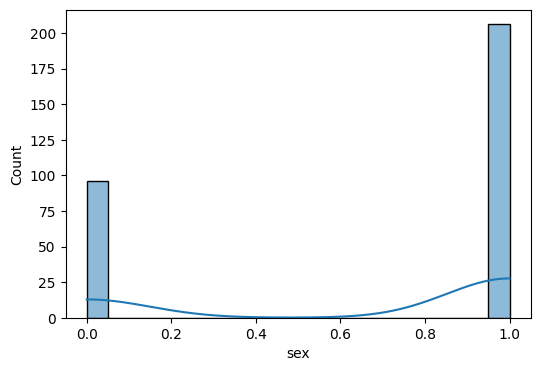

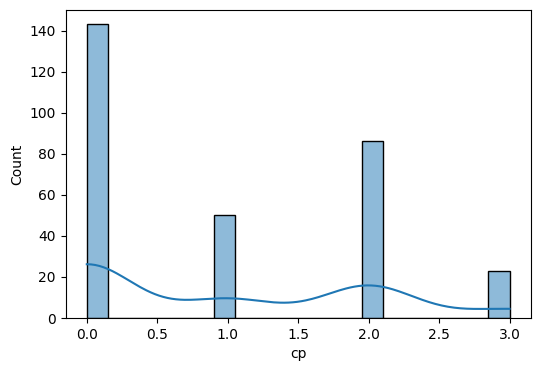

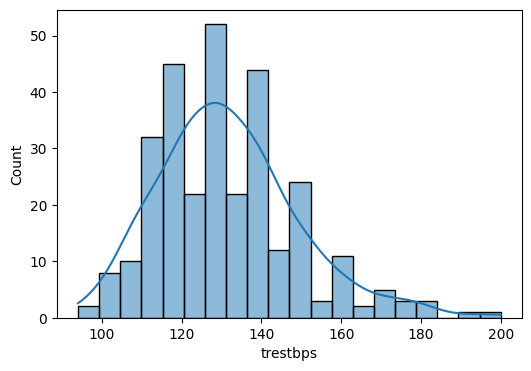

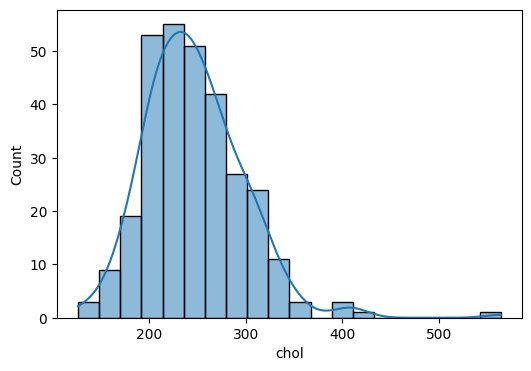

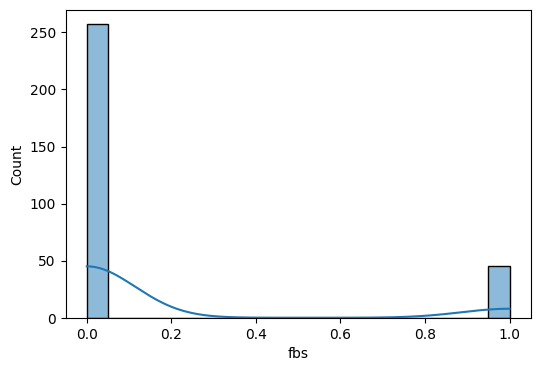

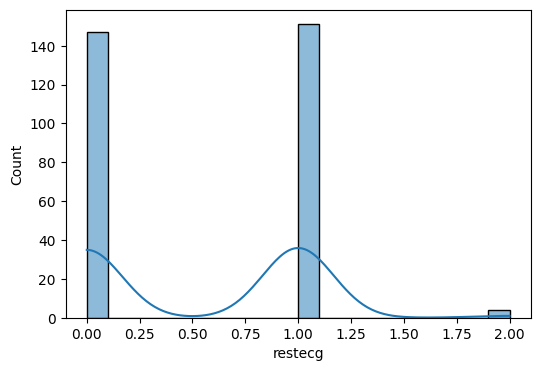

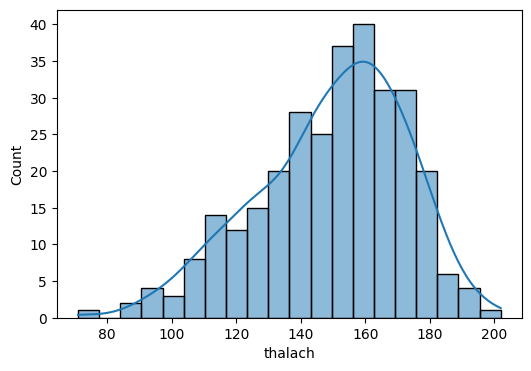

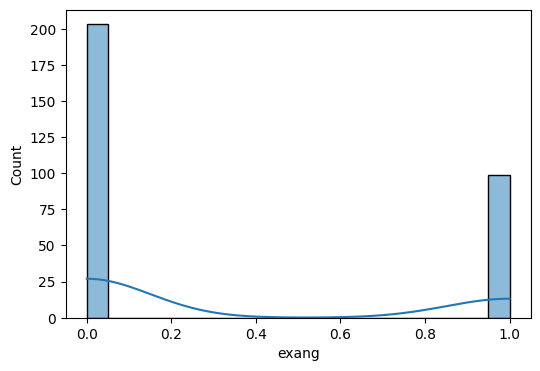

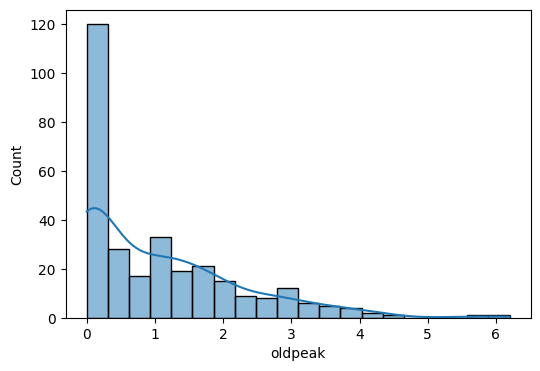

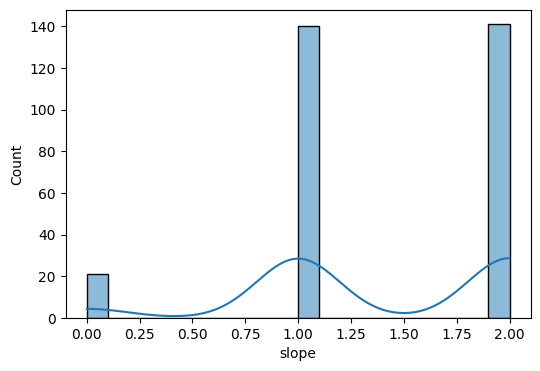

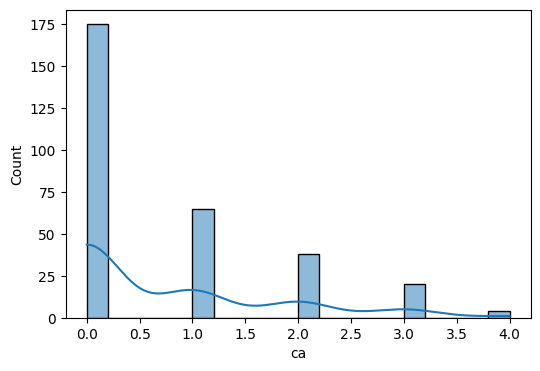

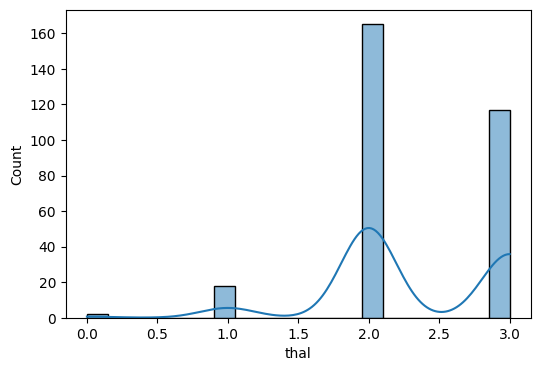

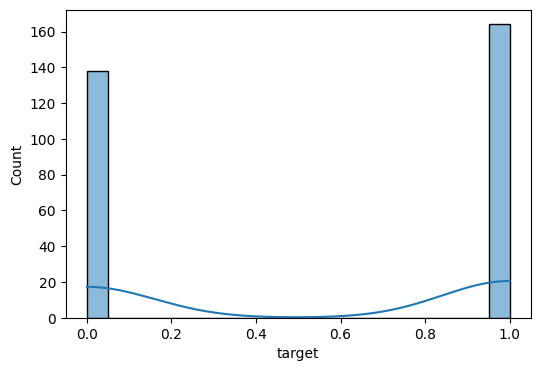

In [60]:
numberic_columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

for col in numberic_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=20)

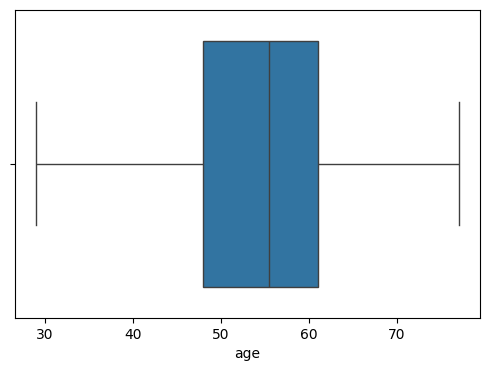

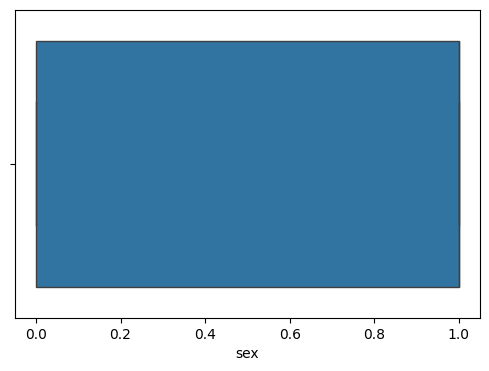

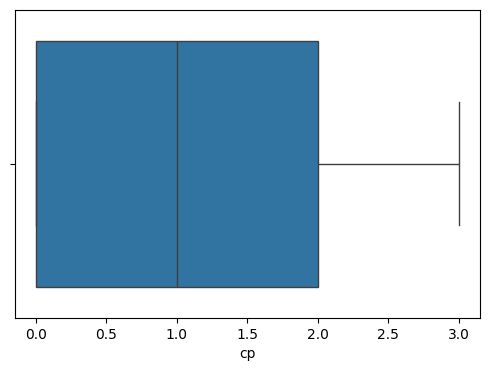

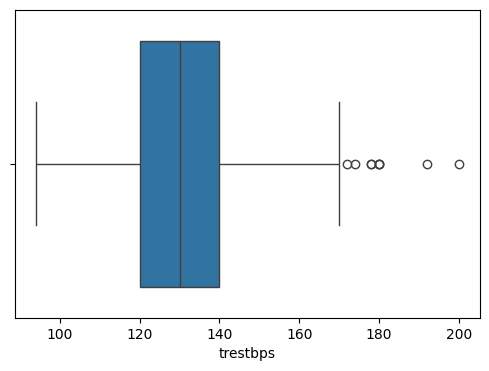

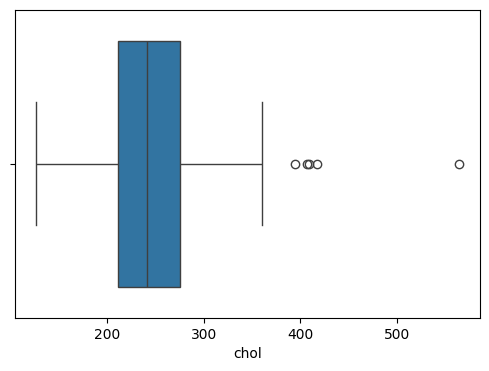

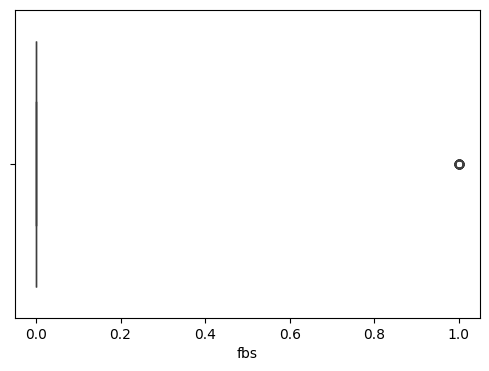

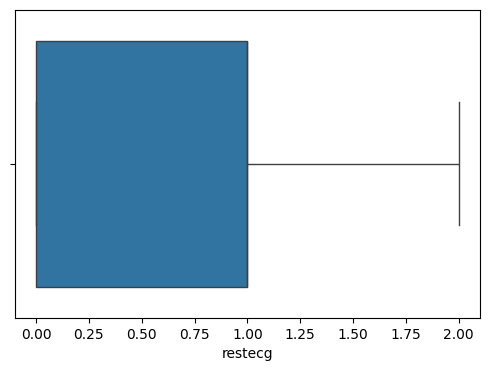

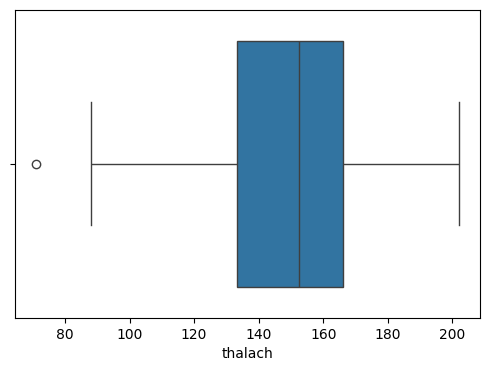

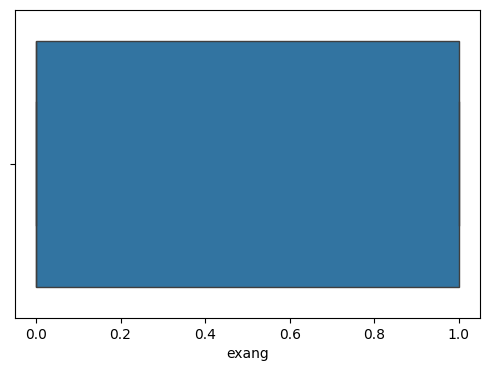

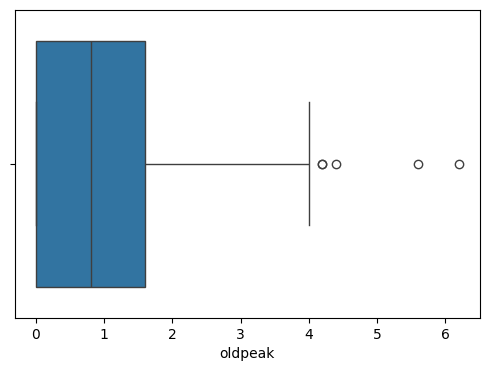

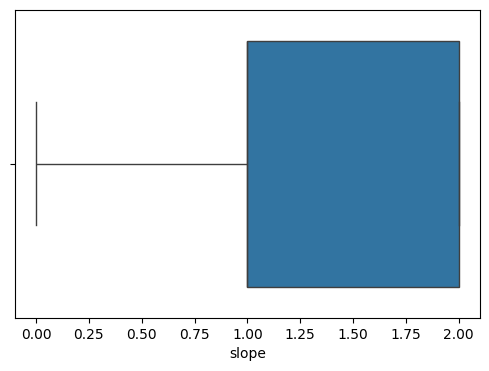

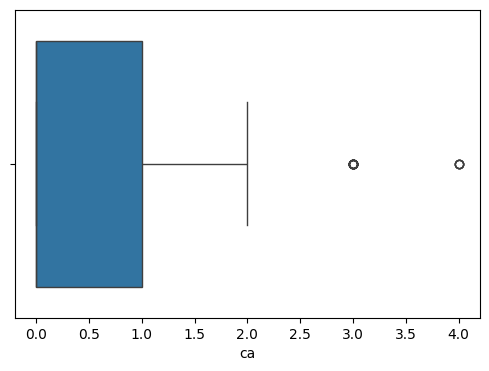

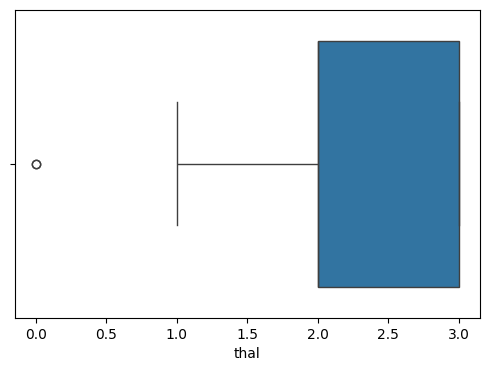

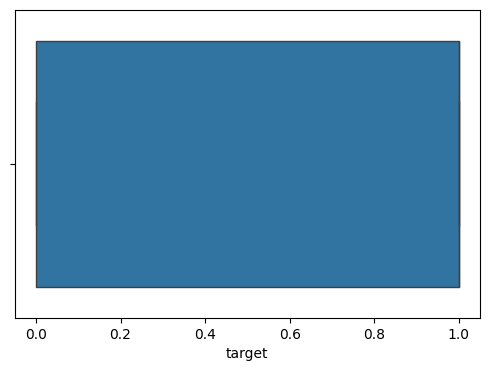

In [61]:
for col in numberic_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x = df[col])

In [62]:
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)

In [63]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [64]:
x = df_encoded.drop('target', axis=1)
y = df_encoded['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [65]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [66]:
models = { 'Linear Regression': LinearRegression(),
          'Logistic Regression': LogisticRegression(),
          'Decision Tree': DecisionTreeClassifier(),
          'K-Nearest Neighbors': KNeighborsClassifier(),
          'Gaussian Naive Bayes': GaussianNB(),
          'Support Vector Classifier': SVC() }

In [67]:
result = []

In [68]:
for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    acc = accuracy_score(y_test, y_pred.round())
    f1 = f1_score(y_test, y_pred.round())
    result.append({ 'model' : name, 
                   'accuracy' : round(acc, 4), 
                   'f1_score' : round(f1, 4) 
                   })

In [69]:
result

[{'model': 'Linear Regression', 'accuracy': 0.8033, 'f1_score': 0.8182},
 {'model': 'Logistic Regression', 'accuracy': 0.7541, 'f1_score': 0.7619},
 {'model': 'Decision Tree', 'accuracy': 0.8033, 'f1_score': 0.7931},
 {'model': 'K-Nearest Neighbors', 'accuracy': 0.7377, 'f1_score': 0.75},
 {'model': 'Gaussian Naive Bayes', 'accuracy': 0.8525, 'f1_score': 0.8475},
 {'model': 'Support Vector Classifier',
  'accuracy': 0.7541,
  'f1_score': 0.7541}]

In [70]:
import joblib
joblib.dump(models['Gaussian Naive Bayes'], 'heart_disease_model.pkl')
joblib.dump(scaler, 'heart_disease_scaler.pkl')
joblib.dump(x.columns.tolist(), 'heart_disease_columns.pkl')

['heart_disease_columns.pkl']